# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fe827567d56c440d073c979fc5b1add34f500c5ea0c784ccf4f0ea38.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Carnegie, Victoria, Australia**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fe827567d56c440d073c979fc5b1add34f500c5ea0c784ccf4f0ea38')

In [2]:
# Data Preprocessing

# Read the data file into DataFrame
df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fe827567d56c440d073c979fc5b1add34f500c5ea0c784ccf4f0ea38.csv")

# Get the day of the year 
df['Day'] = pd.DatetimeIndex(df['Date']).dayofyear

# Convert the Data_Value to true Temperature
df['Data_Value'] = df['Data_Value'] / 10

# Split into two DataFrame, 2005-2014 and 2015
df_2015 = df[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]
df = df[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2014-12-31')]

# Get min and max for each day
df_TMIN = df[df['Element'] == 'TMIN'].groupby(['Day'])[['Data_Value']].min()
df_TMAX = df[df['Element'] == 'TMAX'].groupby(['Day'])[['Data_Value']].max()
df_2015_TMIN = df_2015[df_2015['Element'] == 'TMIN'].groupby(['Day'])[['Data_Value']].min()
df_2015_TMAX = df_2015[df_2015['Element'] == 'TMAX'].groupby(['Day'])[['Data_Value']].max()

<IPython.core.display.Javascript object>


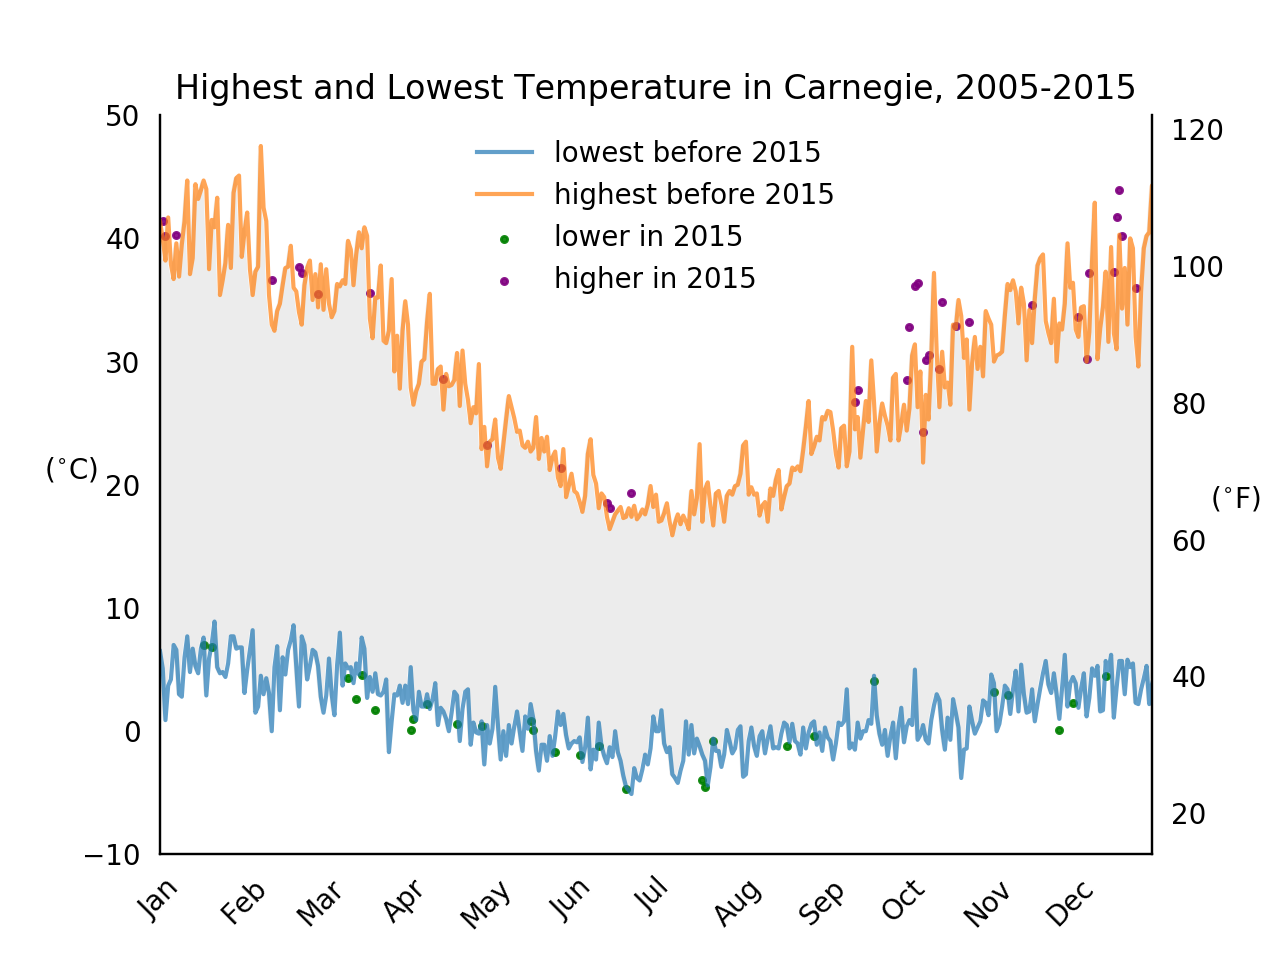

In [3]:
# Draw the line chart

# Draw plot in notebook
%matplotlib notebook
# Plot a new figure
plt.figure()

# Plot the line chart
plt.plot(df_TMIN['Data_Value'], alpha=0.7)
plt.plot(df_TMAX['Data_Value'], alpha=0.7)

In [4]:
# Draw the scatter

# Merge two datasets and filter by lower and higher temperatures
lower = pd.merge(df_TMIN, df_2015_TMIN, left_index=True, right_index=True, how='inner')
lower = lower[(lower['Data_Value_x'] > lower['Data_Value_y'])]

higher = pd.merge(df_TMAX, df_2015_TMAX, left_index=True, right_index=True, how='inner')
higher = higher[(higher['Data_Value_x'] < higher['Data_Value_y'])]

# Draw the scatter
plt.scatter(lower.index, lower['Data_Value_y'], alpha=0.9, c='green', s=5)
plt.scatter(higher.index, higher['Data_Value_y'], alpha=0.9, c='purple', s=5)

In [5]:
# Shade between highest and lowest
plt.fill_between(range(366), df_TMIN['Data_Value'], df_TMAX['Data_Value'], facecolor='gray', alpha=0.15)

In [6]:
# Tune the labels on remove dejunking

# Import matplotlib.dates module for format the text on axis
from matplotlib.dates import *
months = MonthLocator()
monthsFmt = DateFormatter("%b")
ax = plt.gca()
# set the y axis
ax.axis([1, 365, -10, 50])
# set x axis to month
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
# rotate the label on xaxis
plt.xticks(rotation=45)

ax.set_ylabel('($^{\circ}$C)', rotation=0)

# a degree Celsius to Fahrenheit - add second y-lables:
y_min, y_max = ax.get_ylim()
y_min_f = round(y_min*1.8 + 32).astype(pd.np.int64)
y_max_f = round(y_max*1.8 + 32).astype(pd.np.int64)
ax2 = ax.twinx()
ax2.set_ylim(y_min_f, y_max_f)
ax2.set_ylabel('($^{\circ}$F)', rotation=0)

# Remove all the ticks
ax.tick_params(top='off', bottom='off', left='off', right='off')
ax2.tick_params(top='off', bottom='off', left='off', right='off')

# Add a legend
ax.legend(['lowest before 2015', 'highest before 2015', 'lower in 2015', 'higher in 2015'], frameon=False)

# Remove the top border
for (idx, spine) in enumerate(ax.spines.values()):
    if idx == 3:
        spine.set_visible(False)

for (idx, spine) in enumerate(ax2.spines.values()):
    if idx == 3:
        spine.set_visible(False)

# Add a title
plt.title('Highest and Lowest Temperature in Carnegie, 2005-2015')

# Save figure to file
plt.savefig('Assignment2.png')